<a href="https://colab.research.google.com/github/zahoororakzai11/machine-learning/blob/main/Multiple_Linear_Regression_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Specifically, we will:

Load in the titanic dataset from seaborn
Learn a few ways to plot distributions of variables using seaborn
Learn about different kinds of variables including continuous, categorical and ordinal
Perform single and multiple linear regression
Learn about interaction terms
Understand how to interpret coefficients in linear regression
Look at polynomial regression
Understand the assumptions being made in a linear regression model
(Extra): look at some cool plots to raise your EDA game  '''

import numpy as np
import pandas as pd

#Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Working with Titanic Dataset from Seaborn
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Check for Null Values

chosen_vars = ['age','sex','class','embark_town','alone','fare']
titanic = titanic[chosen_vars]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          714 non-null    float64 
 1   sex          891 non-null    object  
 2   class        891 non-null    category
 3   embark_town  889 non-null    object  
 4   alone        891 non-null    bool    
 5   fare         891 non-null    float64 
dtypes: bool(1), category(1), float64(2), object(2)
memory usage: 29.8+ KB


<ipython-input-4-dace68e70c7f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax[0])


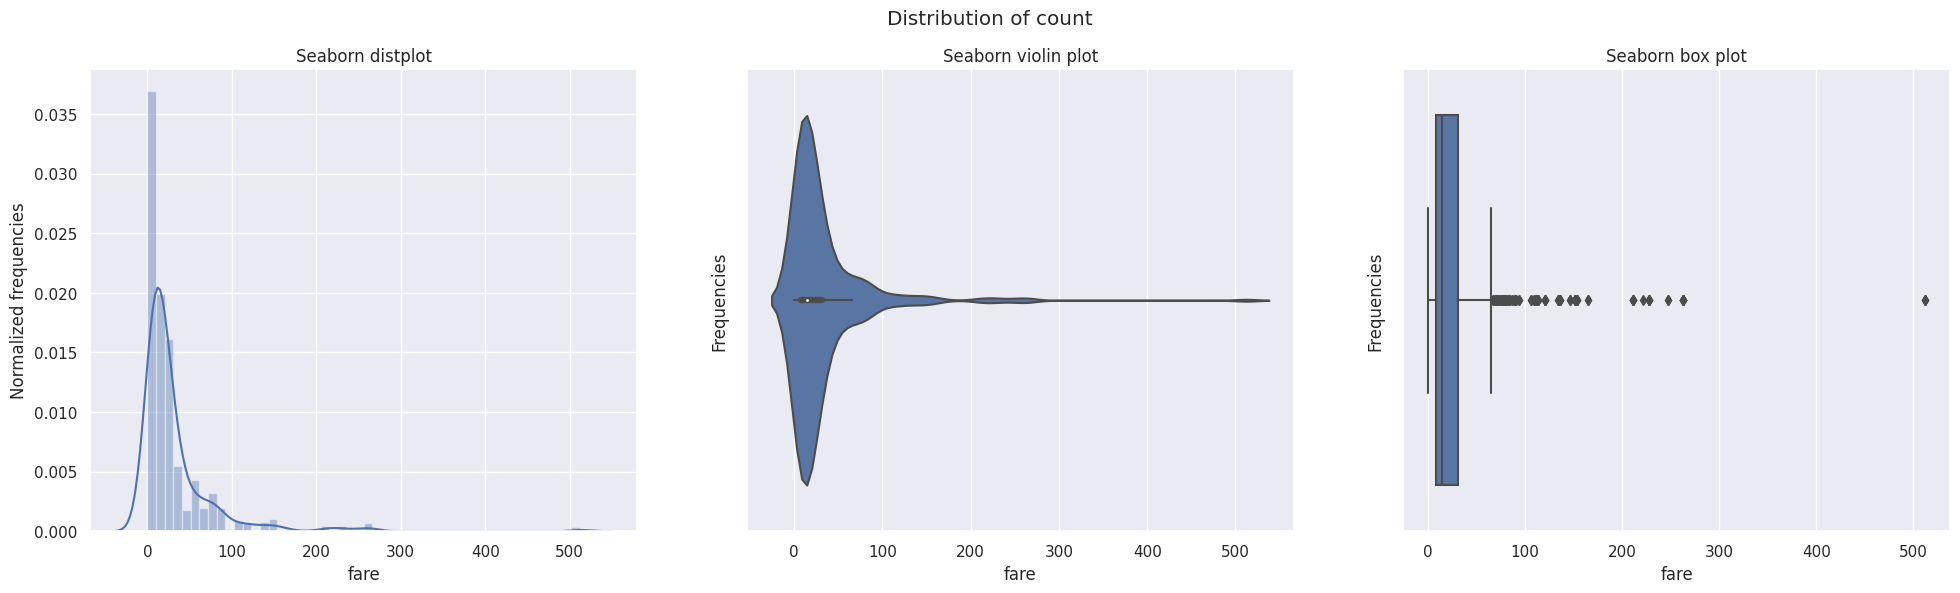

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
ax = ax.ravel()

sns.distplot(titanic['fare'], ax=ax[0])
ax[0].set_title('Seaborn distplot')
ax[0].set_ylabel('Normalized frequencies')

sns.violinplot(x='fare', data=titanic, ax=ax[1])
ax[1].set_title('Seaborn violin plot')
ax[1].set_ylabel('Frequencies')

sns.boxplot(x='fare', data=titanic, ax=ax[2])
ax[2].set_title('Seaborn box plot')
ax[2].set_ylabel('Frequencies')
fig.suptitle('Distribution of count');

In [ ]:
from sklearn.model_selection import train_test_split

titanic_train, titanic_test = train_test_split(titanic, train_size=0.7, random_state=99)
titanic_train = titanic_train.copy()
titanic_test = titanic_test.copy()
print(titanic_train.shape, titanic_test.shape)

(623, 6) (268, 6)


In [ ]:
# Working with different kind of variable
titanic_orig = titanic_train.copy()
titanic_train['sex'].value_counts()

male      397
female    226
Name: sex, dtype: int64

In [ ]:
titanic_train['class_Second'] = (titanic_train['class'] == 'Second').astype(int)
titanic_train['class_Third'] = 1 * (titanic_train['class'] == 'Third') # just another way to do it

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 557 to 641
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           501 non-null    float64 
 1   sex           623 non-null    object  
 2   class         623 non-null    category
 3   embark_town   622 non-null    object  
 4   alone         623 non-null    bool    
 5   fare          623 non-null    float64 
 6   class_Second  623 non-null    int64   
 7   class_Third   623 non-null    int64   
dtypes: bool(1), category(1), float64(2), int64(2), object(2)
memory usage: 35.4+ KB


In [ ]:
# This function automates the above:
titanic_train_copy = pd.get_dummies(titanic_train, columns=['sex', 'class'], drop_first=True)
titanic_train_copy.head()

,age,embark_town,alone,fare,class_Second,class_Third,sex_male,class_Second,class_Third
557,NaN,Cherbourg,True,227.525,0,0,1,0,0
289,22.0,Queenstown,True,7.750,0,1,0,0,1
718,NaN,Queenstown,True,15.500,0,1,1,0,1
822,38.0,Southampton,True,0.000,0,0,1,0,0
759,33.0,Southampton,True,86.500,0,0,0,0,0


In [ ]:

# It seemed like gender interacted with age and class. Can we put that in our model?
titanic_train['sex_male_X_class_Second'] = titanic_train['age'] * titanic_train['class_Second']
titanic_train['sex_male_X_class_Third'] = titanic_train['age'] * titanic_train['class_Third']

model_4 = sm.OLS(
    titanic_train['fare'],
    sm.add_constant(titanic_train[['age', 'sex_male', 'class_Second', 'class_Third', 'sex_male_X_age',
                             'sex_male_X_class_Second', 'sex_male_X_class_Third']])
).fit()
model_4.summary()

NameError: ignored